<a href="https://colab.research.google.com/github/syarifahkemala/Bootcamp-Sanbercode/blob/main/Tugas_2_Pekan_4(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Soal 1: Pemahaman Teori
Jelaskan perbedaan antara Univariate, Bivariate dan Multivariate Analysis 

Jawaban:

Univariate -> sebuah teknik untuk menganalisa data namun hanya 1 feature saja

---
bivariate -> teknik menganalisa data dengan menggunakan 2 var untuk menemukan adanya relasi atau tidak


---

multivariate -> teknik untuk menganalisa data lebih dari 2 var dalam waktu bersamaan

---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB




---



---



---



# Soal 2. Persiapan Data

*   Hapus nilai missing dalam rows dataset menggunakan atribut.dropna()

*   Lakukan grouping data berdasarkan kolom 'species' dengan menggunakan agregasi mean()



In [4]:
#code here
df = df.dropna()

In [52]:
data = df.groupby(['species']).agg('mean')
data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.568067,14.996639,217.235294,5092.436975


Expected output:

![tanpa handling missing value](https://drive.google.com/uc?id=1OnuXmscVRqduqT_TYI1vB291rpXM4D_1)


# Soal 3. Univariate Analysis
Buatlah sebuah analisa univariate dengan menggunakan perintah seperti berikut:

*   Buatlah sebuah Pie plot dari dataset hasil grouping untuk kolom flipper_length_mm seperti expected output berikut:
*   Buatlah sebuah plot histogram dari dataset awal (sebelum grouping) untuk kolom body_mass_g
*   Jelaskan insight yang diperoleh dari ke dua grafik tersebut.





In [54]:
data['flipper_length_mm']

species
Adelie       190.102740
Chinstrap    195.823529
Gentoo       217.235294
Name: flipper_length_mm, dtype: float64

In [50]:
data.get_group('flipper_length_mm')

AttributeError: ignored

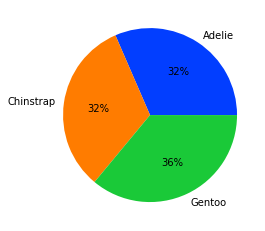

In [56]:
#code here
colors = sns.color_palette('bright')[0:5]
labels = ['Adelie','Chinstrap','Gentoo']

plt.pie(data['flipper_length_mm'], labels = labels, colors=colors, autopct='%.0f%%')
plt.show()

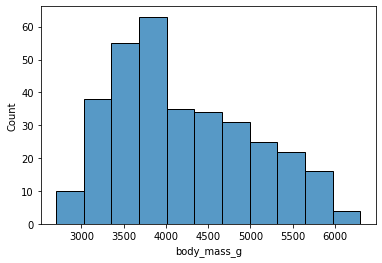

In [57]:
  sns.histplot(data=df, x='body_mass_g')

Expected Output:


Pie Chart

![](https://drive.google.com/uc?id=11H6X7xpEeodPWD56tHBhV4sLrJ-6B-Bd)

Histogram

![](https://drive.google.com/uc?id=1A_twS7BbQhkGvUz7zAWgye7q3ZRTQkhi)

Analisa:


Spesies penguin yang memiliki flipper length tertinggi adalah gentoo
---

ada sebanyak 60 penguin yang memiliki body mass tertinggi yaitu sekitar 3500 gr

---



---



# Soal 4. Bivariate Analysis



*   Buatlah sebuah grafik catplot menggunakan seaborn dengan x='sex', y='bill_length_mm' dan kind 'bar' seperti expected output di bawah
*   Buatlah sebuah grafik scatter plot menggunakan seaborn dengan x='body_mass_g', y='flipper_length_mm', hue='bill_length_mm' seperti expected dibawah
*   Jelaskan insight yang diperoleh dari hasil analisa bivariate tersebut






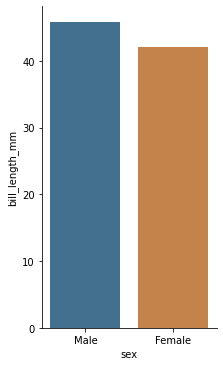

In [59]:
#code here
g = sns.catplot(x="sex", y="bill_length_mm",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.6)

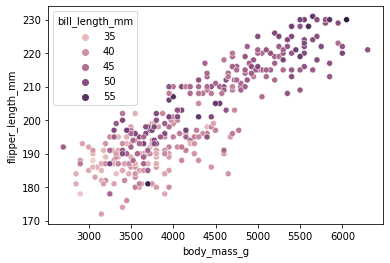

In [61]:
sns.scatterplot(data=df, x="body_mass_g", y='flipper_length_mm', hue='bill_length_mm')

Expected Output:

Catplot

![](https://drive.google.com/uc?id=1imCbGD9cWqXUjd33tAh6D0OH20vVpWea)

Scatter plot

![](https://drive.google.com/uc?id=1_k734IpRYq6Q1wF57hwzSEjnVd2Sii2Z)

Analisa:

Semakin tinggi flipper length yang dimiliki penguin maka semakin naik body mass nya, artinya kedua var ini memiliki korelasi positif

---
Jenis penguin dengan sex male lebih banyak daripada penguin sex female.


---
penguin sex male meiliki body mass yang lebih tinggi daripada penguin sex female


---



# Soal 5. Multivariate Analisis

*   Dengan menggunakan seaborn, buatlah sebuah pairplot keseluruhan data feature pada dataset (df) dengan argumen kind='bar', seperti expected di bawah:
*   Jelaskan hasil analisa dari multivariate yang dihasilkan



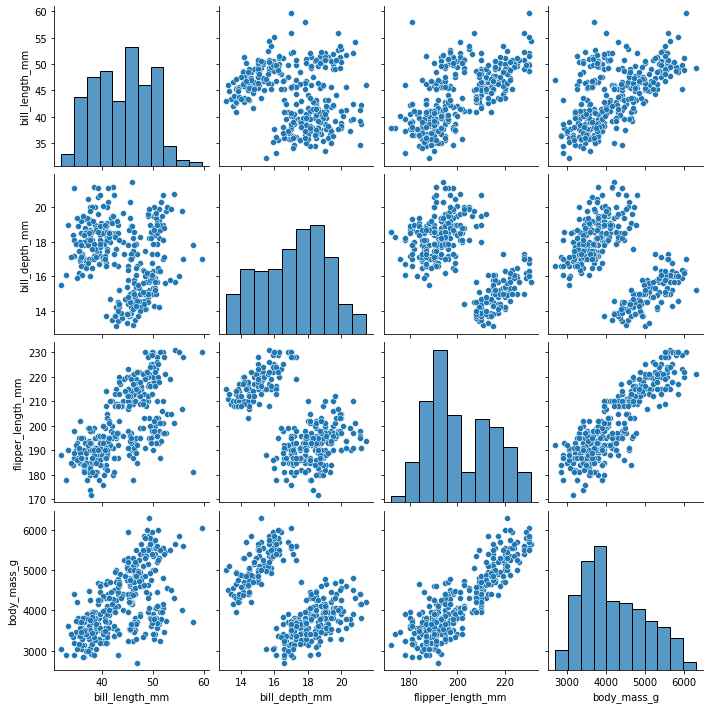

In [63]:
#code here
sns.pairplot(data=df, diag_kind="hist")

Expected output:

Pair plot

![](https://drive.google.com/uc?id=1td8WAZLJEW5BPTq-wEJyZ4soRNNLXfqX)

Analisa:

Bill length banyak yang berisi penguin yang memilki body mass sekitar 3000 - 4000

---
penguin dengan body mass dan flipper length yang rendah lebih banyak dari pada penguin dengan body mass dan flipper length yang tinggi 


---
penguin dengan bill depth tinggi memiliki flipper length yang rendah dan body mass yang rendah


---

